In [3]:
import pandas as pd

# 定义CSV文件路径
csv_path = 'training_norm.csv'  # 请替换为实际文件路径

# 加载数据
data = pd.read_csv(csv_path)

# 显示数据的前几行，以便进行检查
print(data.head())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
   image_id   angle  speed
0         1  0.4375    0.0
1         2  0.8125    1.0
2         3  0.4375    1.0
3         4  0.6250    1.0
4         5  0.5000    0.0


In [2]:
def data_overview(df):

    print(f"Data set size: {df.shape}")
    print(f"Data set include {df.shape[0]} row {df.shape[1]} colunm \n")
    
    # 查看列名和数据类型
    print("Column names and data types:")
    print(df.dtypes)
    
    # 基本统计信息
    print("\n Basic statistics:")
    print(df.describe())

    # 查看前几行数据
    print("\nfirst few rows of data set:")
    print(df.head())

# 调用函数进行数据概览
data_overview(data)

Data set size: (13793, 3)
Data set include 13793 row 3 colunm 

Column names and data types:
image_id      int64
angle       float64
speed       float64
dtype: object

 Basic statistics:
           image_id         angle         speed
count  13793.000000  13793.000000  13793.000000
mean    6899.790473      0.605062      0.754254
std     3983.649259      0.155558      0.430596
min        1.000000      0.000000      0.000000
25%     3450.000000      0.500000      1.000000
50%     6900.000000      0.625000      1.000000
75%    10350.000000      0.750000      1.000000
max    13798.000000      1.000000      1.428571

first few rows of data set:
   image_id   angle  speed
0         1  0.4375    0.0
1         2  0.8125    1.0
2         3  0.4375    1.0
3         4  0.6250    1.0
4         5  0.5000    0.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13793 entries, 0 to 13792
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  13793 non-null  int64  
 1   angle     13793 non-null  float64
 2   speed     13793 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 323.4 KB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

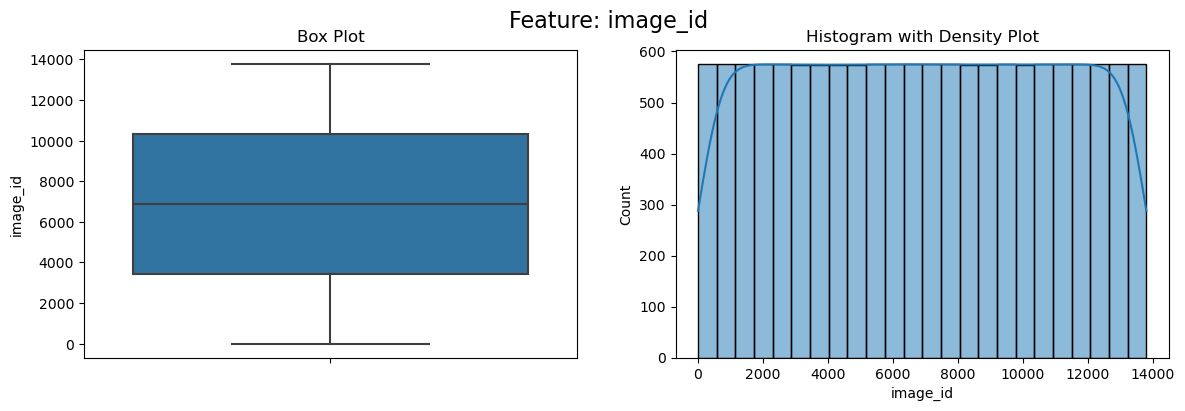

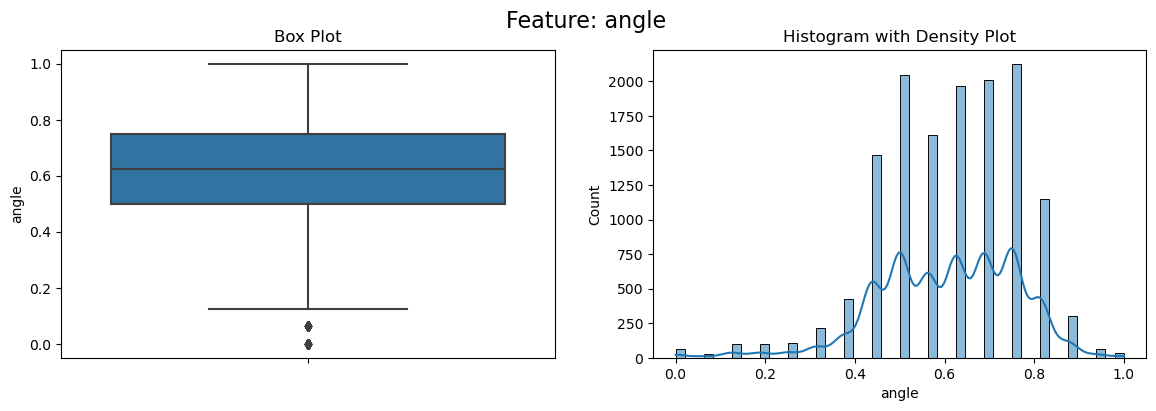

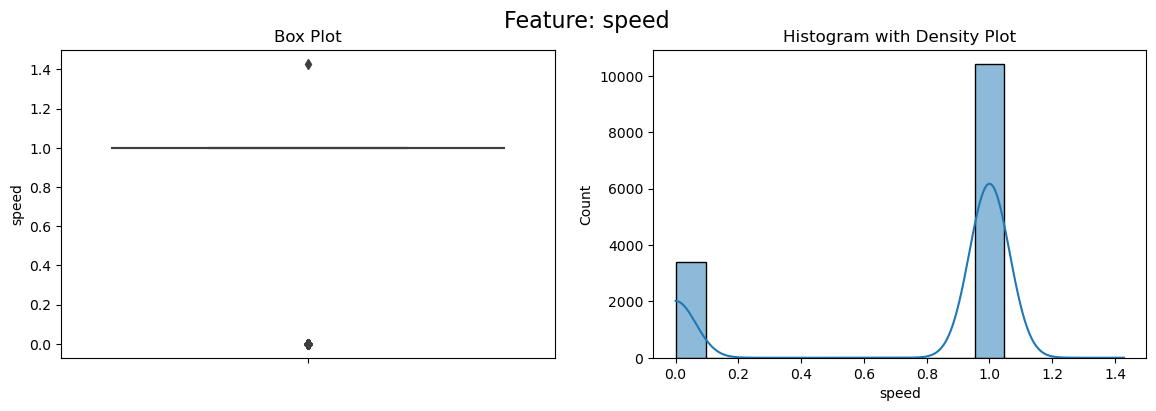

In [6]:
def plot_features_distribution(df):
  
    num_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    for feature in num_features:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
        fig.suptitle(f'Feature: {feature}', fontsize=16)
        
        # Draw box plot
        sns.boxplot(data=df, y=feature, ax=axs[0])
        axs[0].set_title('Box Plot')
        
        # Draw a histogram
        sns.histplot(data=df, x=feature, kde=True, ax=axs[1])
        axs[1].set_title('Histogram with Density Plot')
        
        plt.show()
    
plot_features_distribution(data)

In [14]:
Q1 = data['angle'].quantile(0.25)
Q3 = data['angle'].quantile(0.75)
IQR = Q3 - Q1

# 定义异常值的布尔索引
outliers = (data['angle'] < (Q1 - 1.5 * IQR)) | (data['angle'] > (Q3 + 3 * IQR))

# 使用布尔索引提取异常值
outlier_values = data['angle'][outliers]

print(outlier_values)

171      0.0000
288      0.0625
374      0.0625
779      0.0000
783      0.0000
          ...  
13060    0.0000
13194    0.0000
13645    0.0000
13658    0.0625
13767    0.0625
Name: angle, Length: 88, dtype: float64


In [5]:
def check_missing_values(df):

    print("\nchecking missing value:\n", df.isnull().sum())

check_missing_values(data)



checking missing value:
 image_id    0
angle       0
speed       0
dtype: int64


In [12]:
from PIL import Image, ImageStat
import numpy as np

def explore_image_features(image_paths):

    resolutions = []  # Storage resolution
    brightnesses = []  # Store brightness

    #training_data/training_data/1.png
    image_paths = [f'training_data/training_data/{i}.png' for i in image_paths]
    for path in image_paths:
        with Image.open(path) as img:
            # Calculate resolution
            resolutions.append(img.size)
            
            # Calculate brightness
            stat = ImageStat.Stat(img)
            brightness = sum(stat.mean) / len(stat.mean)
            brightnesses.append(brightness)

    # Calculate average resolution and brightness
    avg_resolution = np.mean(resolutions, axis=0)
    avg_brightness = np.mean(brightnesses)

    return avg_resolution, avg_brightness, brightnesses


avg_res, avg_bright, brightnesses = explore_image_features(data['image_id'].tolist())  # 替换'image_path'为你的实际图像路径列名

# result
print(f"Average Resolution: {avg_res}")
print(f"Average Brightness: {avg_bright}")


Average Resolution: [320. 240.]
Average Brightness: 172.64112323143044


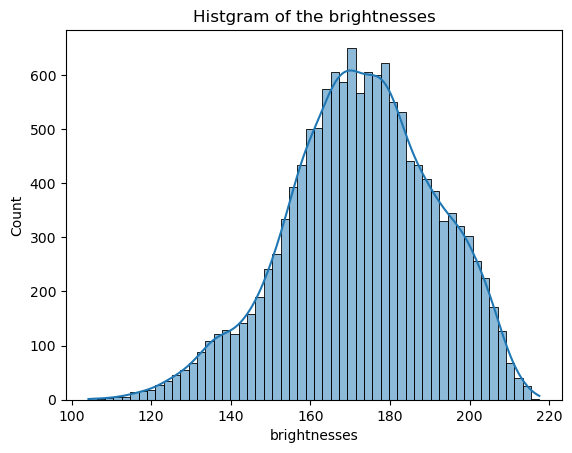

In [15]:
def plot_image_feature_distribution(brightnesses):

    #brightnesses
    sns.histplot(brightnesses, kde=True)
    plt.title('Histgram of the brightnesses')
    plt.xlabel('brightnesses')
    plt.show()
    
# _, _, resolutions, brightnesses = explore_image_features(data['image_id'].tolist())
plot_image_feature_distribution(brightnesses)